In [180]:
from bs4 import BeautifulSoup
import requests
import pymongo
from splinter import Browser
import urllib.request 
import pandas as pd
import numpy as np
import psycopg2 as ps2
from sqlalchemy import create_engine
from config import hey_create_engine_to_Obesitydb
import matplotlib.pyplot as plt

In [158]:
temp = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'
temp_tables = pd.read_html(temp,header =0)
income_df = temp_tables[1]
pd.set_option('display.max_rows', None)
income_df1=income_df.rename(columns={'International Monetary Fund (2019 estimates)[3]': 'A',
                                    'World Bank (2018)[4]':'country',
                                    'United Nations (2017)[5]':'GDP'})
income_df2 = income_df1.drop(columns=['A'])
income_df3= income_df2.drop([0,1])
#income_df_cleaned = income_df3.set_index('country')
#income_df_cleaned
income_df4=income_df3.iloc[407:]
income_df_cleaned = income_df4.set_index('country')
income_df_cleaned.head()

,GDP
country,
Liechtenstein,166022
Monaco,165421
Luxembourg,106806
Bermuda,102192
Macau,80893


In [159]:
csv_file = "data.csv"
data_df = pd.read_csv(csv_file)
data_df.head()
bmi_df=data_df.drop(data_df.loc[:, '2015':'1975.2'].columns, axis = 1)
#bmi_df1=bmi_df.drop(bmi_df.loc[:, '2015.1':'1975.2'].columns, axis = 1)
bmi_df3=bmi_df.rename(columns={'A': 'country','2016': 'Total','2016.1': 'Male','2016.2': 'Female'})
bmi_df3.drop(bmi_df3.index[:3], inplace=True)
bmi_df4 = bmi_df3.set_index('country')

bmi_df4['Total']= bmi_df4['Total'].str.split('[', 1, expand=True)
bmi_df4['Male']= bmi_df4['Male'].str.split('[', 1, expand=True)
bmi_df4['Female']= bmi_df4['Female'].str.split('[', 1, expand=True)
bmi_df_cleaned=bmi_df4
#bmi_df_cleaned.iloc[bmi_df_cleaned['United States of America']]
index = bmi_df_cleaned.index[["country"] == "United States of America"]
bmi_df_cleaned.rename(index={'United States of America':'United States'},inplace=True)
index = bmi_df_cleaned.index[["country"] == "United Kingdom of Great Britain and Northern Ireland"]
bmi_df_cleaned.rename(index={'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'},inplace=True)

bmi_df_cleaned.head()

,Total,Male,Female
country,,,
Afghanistan,5.5,3.2,7.6
Albania,21.7,21.6,21.8
Algeria,27.4,19.9,34.9
Andorra,25.6,25.9,25.3
Angola,8.2,4.0,12.1


In [149]:
combined_df1= bmi_df_cleaned.join(income_df_cleaned)
combined_df2 = combined_df1.dropna(axis=0,how='any')
combined_df =  combined_df2.drop(index=['Monaco','San Marino','South Sudan','Sudan'])
combined_df

,Total,Male,Female,GDP
country,,,,
Afghanistan,5.5,3.2,7.6,619
Albania,21.7,21.6,21.8,4450
Algeria,27.4,19.9,34.9,4055
Andorra,25.6,25.9,25.3,39153
Angola,8.2,4.0,12.1,4247
Antigua and Barbuda,18.9,11.6,25.9,14803
Argentina,28.3,27.3,29.0,14400
Armenia,20.2,17.1,23.0,3937
Australia,29.0,29.6,28.4,57613


In [150]:
engine = create_engine(hey_create_engine_to_Obesitydb)
engine.table_names()

['income', 'obesity']

In [156]:
income_df_cleaned.to_sql(name='income', con=engine, if_exists='replace', index=True)
bmi_df_cleaned.to_sql(name='obesity', con=engine, if_exists='replace', index=True)
combined_df.to_sql(name='combined_data', con=engine, if_exists='replace', index=True)

In [153]:
pd.read_sql_query('select * from income', con=engine).head()

,country,GDP
0,Liechtenstein,166022
1,Monaco,165421
2,Luxembourg,106806
3,Bermuda,102192
4,Macau,80893


In [154]:
pd.read_sql_query('select * from obesity', con=engine).head()

,country,Total,Male,Female
0,Afghanistan,5.5,3.2,7.6
1,Albania,21.7,21.6,21.8
2,Algeria,27.4,19.9,34.9
3,Andorra,25.6,25.9,25.3
4,Angola,8.2,4.0,12.1


In [178]:
df = pd.read_sql_query('select * from combined_data', con=engine)
df['GDP'] = df['GDP'].astype(int)
df['Total'] = df['Total'].astype(float)

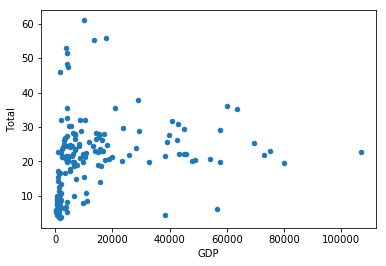

In [179]:
df.plot(x ='GDP', y='Total',kind='scatter')